In [14]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [ ]:
#Exercici 1: 
#A. Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia
#B. Tingues en compte que prèviament et caldrà preparar el dataset.
#C. Classifica els diferents registres utilitzant l'algorisme de K-means.


In [2]:
data = pd.read_csv('Publicacions Facebook Thailandia.csv')

In [3]:
data = data[['status_type', 'status_published', 'num_reactions', 'num_comments', 'num_shares']]  # selecciona solo estas columnas del conjunto de datos

In [7]:
data = data.rename(columns={'status_type': 'tipo_de_estado', 'status_published': 'publicado', 'num_reactions': 'reacciones', 'num_comments': 'comentarios', 'num_shares': 'compartidos'})  # cambia el nombre de las columnas

In [8]:
data = data.dropna()  # elimina filas con valores faltantes

In [9]:
data.to_csv('datos_manipulados.csv', index=False)  # guarda los datos manipulados en un nuevo archivo CSV

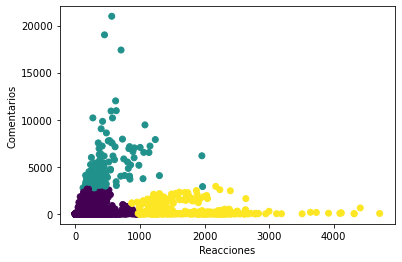

In [10]:
#C. 
data = pd.read_csv('datos_manipulados.csv')
#Seleccionar las características
X = data[['reacciones', 'comentarios', 'compartidos']]
#Elegir el número de clústeres
kmeans = KMeans(n_clusters=3)
#Entrenar el modelo
kmeans.fit(X)
#Obtener las etiquetas de clúster
labels = kmeans.predict(X)
#Visualizar los resultados
plt.scatter(X['reacciones'], X['comentarios'], c=labels)
plt.xlabel('Reacciones')
plt.ylabel('Comentarios')
plt.show()

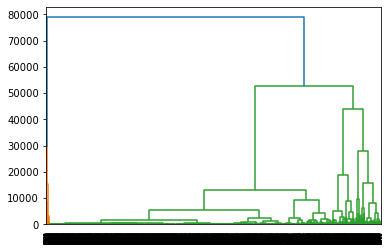

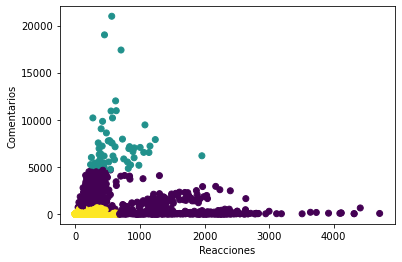

In [12]:
#Exercici2: Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.
#1. Seleccionar las características
X = data[['reacciones', 'comentarios', 'compartidos']]
#2. Calcular la matriz de enlace
Z = linkage(X, 'ward')
#3. Visualizar el dendrograma
dendrogram(Z)
plt.show()
#4. Elegir el número de clústeres
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
#5. Entrenar el modelo
model.fit(X)
#6. Obtener las etiquetas de clúster
labels = model.labels_
#7. Visualizar los resultados
plt.scatter(X['reacciones'], X['comentarios'], c=labels)
plt.xlabel('Reacciones')
plt.ylabel('Comentarios')
plt.show()

In [15]:
#Exercici3. Calcula el rendimiento del clustering mitjançant un paràmetre com pot ser silhouette.
score = silhouette_score(X, labels)
print("El coeficiente de silhouette es:", score)

#En general, un valor de silhouette cercano a 1 indica que los clústeres están bien separados, mientras que un valor cercano a 0 indica una superposición significativa entre los clústeres o que los registros podrían haber sido etiquetados incorrectamente.
#Por lo tanto, en este caso, el coeficiente de silhouette indica que el algoritmo de clustering ha funcionado bien en términos de separar los registros en clústeres distintos y coherentes.

El coeficiente de silhouette es: 0.7546668187358249
